In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt


In [2]:
# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)


In [3]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Open", "High", "Low", "Close"]]


[*********************100%%**********************]  1 of 1 completed


In [17]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [4]:
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Open", "High", "Low", "Close"])


In [5]:
# Train-test split
training_size = round(len(data1) * 0.80)
train_data, test_data = data1[:training_size], data1[training_size:]


In [13]:
# Fit VAR model
model = VAR(train_data)
model_fit = model.fit(maxlags=4)

# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.forecast(train_data.values[-model_fit.k_ar:], steps=forecast_steps)


In [14]:
forecast

array([[0.32738533, 0.27545358, 0.32487807, 0.31111567],
       [0.32506711, 0.27688811, 0.32392751, 0.31566145],
       [0.33027605, 0.28523869, 0.33260647, 0.33428493],
       [0.34262073, 0.29374837, 0.34284442, 0.33876915],
       [0.34701886, 0.29836375, 0.34921691, 0.33974354],
       [0.34964702, 0.30033918, 0.34929237, 0.34123386],
       [0.35315279, 0.30459192, 0.35480801, 0.34832106],
       [0.35918249, 0.31097632, 0.36213093, 0.3556182 ],
       [0.36505712, 0.31633492, 0.36831376, 0.36031079],
       [0.36969022, 0.32036212, 0.37278926, 0.36357393],
       [0.37338152, 0.32410069, 0.37654709, 0.36751641],
       [0.37735905, 0.32821657, 0.38106589, 0.3722121 ],
       [0.38169669, 0.33253346, 0.38587902, 0.37669465],
       [0.38586802, 0.33647613, 0.39024519, 0.38044478],
       [0.38958188, 0.34005889, 0.39411045, 0.38392833],
       [0.39308419, 0.34351694, 0.39783387, 0.3875156 ],
       [0.39657502, 0.34697872, 0.40161645, 0.39112523],
       [0.40001941, 0.35033964,

In [15]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=train_data.columns)
forecast_df

,Open,High,Low,Close
114,0.327385,0.275454,0.324878,0.311116
115,0.325067,0.276888,0.323928,0.315661
116,0.330276,0.285239,0.332606,0.334285
117,0.342621,0.293748,0.342844,0.338769
118,0.347019,0.298364,0.349217,0.339744
119,0.349647,0.300339,0.349292,0.341234
120,0.353153,0.304592,0.354808,0.348321
121,0.359182,0.310976,0.362131,0.355618
122,0.365057,0.316335,0.368314,0.360311
123,0.369690,0.320362,0.372789,0.363574


In [9]:
# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)


In [16]:
# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv

,Open,High,Low,Close
0,719.000000,721.950012,705.049988,709.650024
1,707.500000,708.000000,685.099976,688.900024
2,680.950012,681.849976,660.099976,674.349976
3,683.000000,683.000000,662.500000,665.849976
4,670.000000,676.849976,664.000000,669.349976
5,677.000000,684.500000,672.599976,678.799988
6,681.150024,682.000000,662.450012,667.500000
7,663.049988,674.599976,655.950012,672.150024
8,677.299988,680.849976,672.000000,675.450012
9,674.500000,679.599976,667.250000,670.500000


In [11]:
# Evaluation
for column in ["Open", "High", "Low", "Close"]:
    print(f"Evaluating {column} prices")
    rmsemape(test_data_inv[column], forecast_df_inv[column])
    print("************")

Evaluating Open prices
RMSE-Testset: 29.824355817150302
MAPE-Testset: 3.5164969646439364
************
Evaluating High prices
RMSE-Testset: 30.196604060916528
MAPE-Testset: 3.4133324885098917
************
Evaluating Low prices
RMSE-Testset: 30.783660687809427
MAPE-Testset: 3.7045034242125627
************
Evaluating Close prices
RMSE-Testset: 30.547746951184262
MAPE-Testset: 3.5844604596080796
************


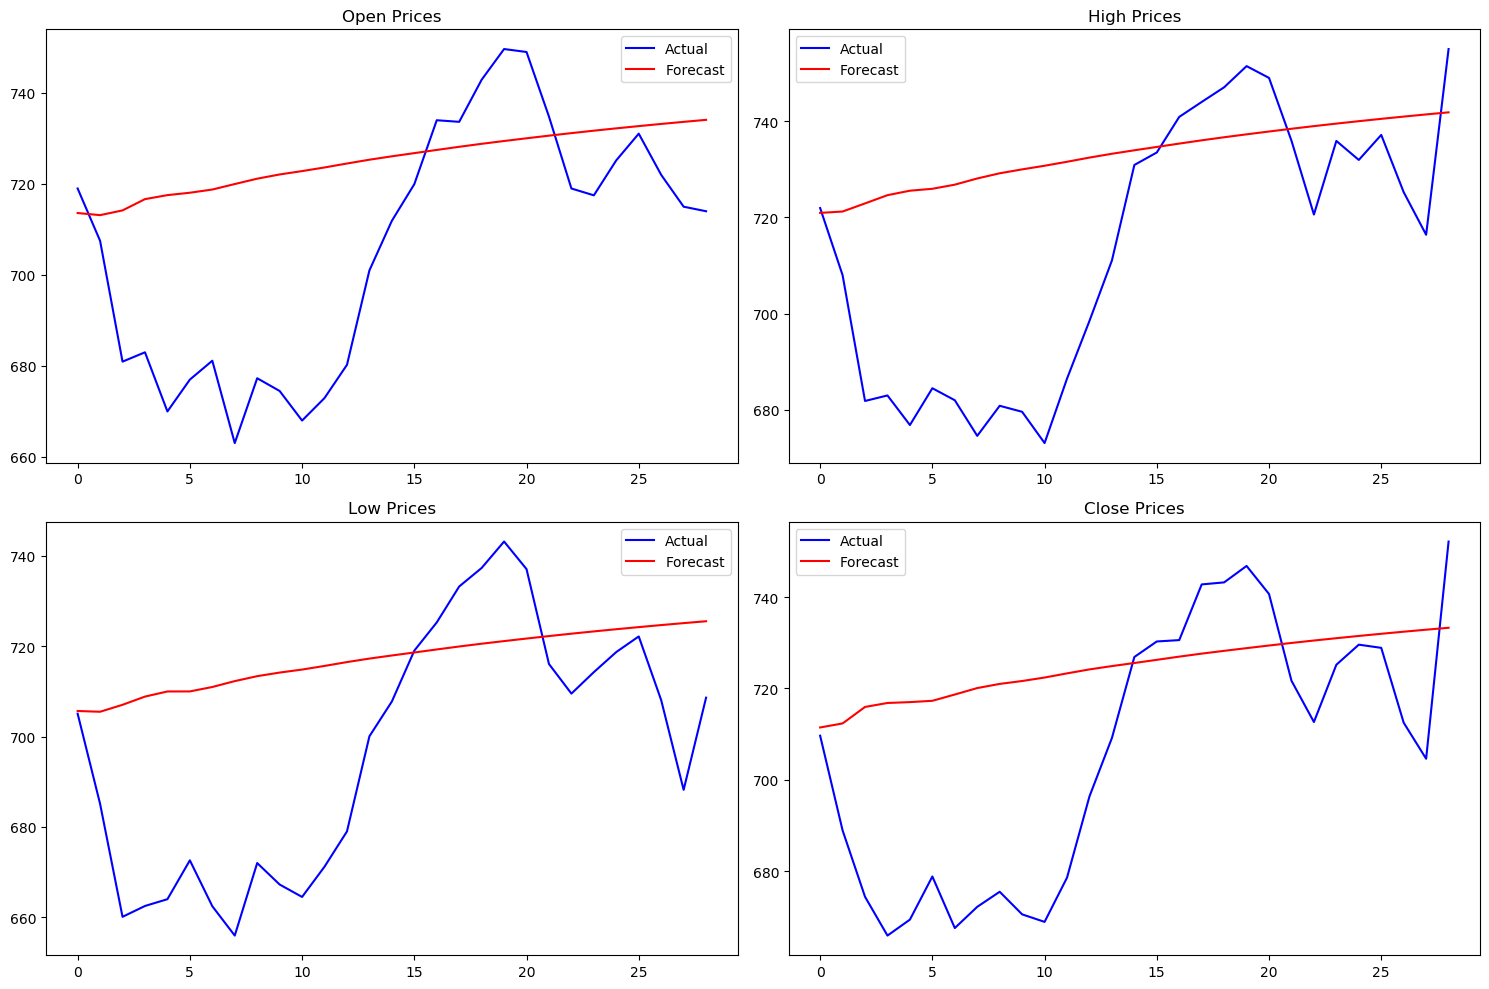

In [12]:
# Plotting results
plt.figure(figsize=(15, 10))
for i, column in enumerate(["Open", "High", "Low", "Close"], 1):
    plt.subplot(2, 2, i)
    plt.plot(test_data_inv[column], label='Actual', color='blue')
    plt.plot(forecast_df_inv[column], label='Forecast', color='red')
    plt.title(f'{column} Prices')
    plt.legend()

plt.tight_layout()
plt.show()